# 📱 Relation of Phone Use and Weather Conditions

In this project, we investigate the **relationship between daily weather conditions and personal phone usage behaviors**. The analysis is based on a combination of self-collected phone usage data and weather records for the corresponding days.

## Variables Used

### 🌤️ Weather-Related Factors:
- Average Temperature (°C)  
- Precipitation Rate (mm)  
- Weather Type (Categorized)  

### 📱 Phone Usage Indicators:
- Number of photos taken (indoors and outdoors)  
- Total screen time (minutes)  
- Time spent on social media (minutes)

## 🧩 Supplementary Variables
- Weekend/Weekday status  
- Lecture load  
- Sleep and wake times

# The data is **processed**, **cleaned**, and **visualized** to identify potential patterns and test specific hypotheses.

# Import file and libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind, f_oneway
from sklearn.linear_model import LinearRegression

sns.set(style="whitegrid")
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

df = pd.read_excel("dsa_weather_merged_data.xlsx")

Saving dsa_weather_merged_data.xlsx to dsa_weather_merged_data.xlsx


# Part 1: Data Exploration

#### General information: This will facilitate understanding the data by displayin all variables and format of the file uploaded

In [ ]:
df.info() # We can see this raw data have some problems they should be handled later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     43 non-null     object 
 1   Wake Up Time             42 non-null     float64
 2   Sleep Time               39 non-null     float64
 3   Notifications            41 non-null     float64
 4   Social Media (min)       42 non-null     float64
 5   Screen Time (min)        43 non-null     int64  
 6   Focus Time (min)         34 non-null     float64
 7   Is_Weekend               43 non-null     int64  
 8   Lecture Count            43 non-null     int64  
 9   Avg Temperature (°C)     43 non-null     float64
 10  Precipitation Rate (mm)  43 non-null     float64
 11  Weather Type             43 non-null     object 
 12  Number of Photots taken  43 non-null     int64  
 13  Photos Taken Outdoor     43 non-null     int64  
dtypes: float64(7), int64(5), obj

#### A part of table as a Sample

In [ ]:
df.head()

,Date,Wake Up Time,Sleep Time,Notifications,Social Media (min),Screen Time (min),Focus Time (min),Is_Weekend,Lecture Count,Avg Temperature (°C),Precipitation Rate (mm),Weather Type,Number of Photots taken,Photos Taken Outdoor
0,14-03-2025,8.2,1.10,233.0,125.0,177,165.0,0,5,18.9,0.00,Partially cloudy,20,20
1,15-03-2025,11.0,0.46,69.0,150.0,116,172.0,1,0,19.7,0.00,Partially cloudy,16,14
2,16-03-2025,9.2,2.28,178.0,110.0,187,219.0,1,0,22.1,0.00,Partially cloudy,24,20
3,17-03-2025,8.2,0.12,211.0,149.0,183,158.0,0,8,15.6,1.22,"Rain, Partially cloudy",26,24
4,18-03-2025,8.4,0.18,492.0,181.0,133,202.0,0,5,6.8,9.45,"Rain, Partially cloudy",6,6


#### This is the information of null values and proportions among variables.

In [ ]:
print(df.isnull().sum())
(df.isnull().mean() * 100).round(2)

Date                       0
Wake Up Time               1
Sleep Time                 4
Notifications              2
Social Media (min)         1
Screen Time (min)          0
Focus Time (min)           9
Is_Weekend                 0
Lecture Count              0
Avg Temperature (°C)       0
Precipitation Rate (mm)    0
Weather Type               0
Number of Photots taken    0
Photos Taken Outdoor       0
dtype: int64


,0
Date,0.00
Wake Up Time,2.33
Sleep Time,9.30
Notifications,4.65
Social Media (min),2.33
Screen Time (min),0.00
Focus Time (min),20.93
Is_Weekend,0.00
Lecture Count,0.00
Avg Temperature (°C),0.00


#### General information of the all raw data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wake Up Time,42.0,8.822619,1.199502,6.50,8.125,9.1,9.850,11.20
Sleep Time,39.0,1.242308,0.877405,0.05,0.440,1.2,2.130,3.30
Notifications,41.0,334.243902,144.482833,44.00,214.000,316.0,434.000,666.00
Social Media (min),42.0,189.952381,69.616003,108.00,139.000,173.0,224.250,354.00
Screen Time (min),43.0,121.348837,42.971687,36.00,90.500,120.0,147.500,208.00
Focus Time (min),34.0,163.382353,32.634816,104.00,141.250,158.0,181.750,244.00
Is_Weekend,43.0,0.279070,0.453850,0.00,0.000,0.0,1.000,1.00
Lecture Count,43.0,4.441860,3.065183,0.00,0.000,5.0,8.000,8.00
Avg Temperature (°C),43.0,11.983721,4.117323,4.90,8.150,11.8,14.450,22.10
Precipitation Rate (mm),43.0,0.914651,2.081356,0.00,0.000,0.0,0.815,9.45


## Enrich and Refine Data
After we import the raw data first, then we need to enrich it to use in more efficient way.
Because my data is collected by myself mostly, there are only small problems with the dataset.

Some steps of data enrichment and refinement:
- Handling null values
- Creation of new values
- Grouping values

In [ ]:
# Firstly, I need to find and handle null values
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
# Now I handled all null values and filled all of them with mean.

In [ ]:
# Secondly, I can use some additional columns created by based on present values. Also, I can rename columns
df.rename(columns={"Number of Photots taken": "Photos Taken"}, inplace=True)

df['Time Out Social Media'] = df['Screen Time (min)'] - df['Social Media (min)']
df["Precip_Group"] = pd.cut(df["Precipitation Rate (mm)"],
                            bins=[-0.01, 0, 1, 3, 10, 100],
                            labels=["0", "0.01-1", "1-3", "3-10", "10+"])
photo_bins = pd.cut(df["Photos Taken"], bins=[-1, 0, 10, 30, 100], labels=["0", "1-10", "10-30", "30+"])
precip_bins = pd.cut(df["Precipitation Rate (mm)"], bins=[-0.01, 0, 1, 5, 100], labels=["0", "0.01-1", "1-5", "5+"])

In [ ]:
# This will mark good and bad weathers to visualize later
good_weather = ["Clear", "Sunny", "Partially cloudy", "Cloudy"]
df["Weather Group"] = df["Weather Type"].apply(lambda x: "Clean Weather" if x in good_weather else "Others")

# This will add rain information to data by searching for the key
df["Is_Rainy"] = df["Weather Type"].apply(lambda x: "Rain" in str(x))

# Visualization of Data

#### Visualization of Refined Numeric Data
This are graphs that shows outliers and general information about each **numeric** variable.

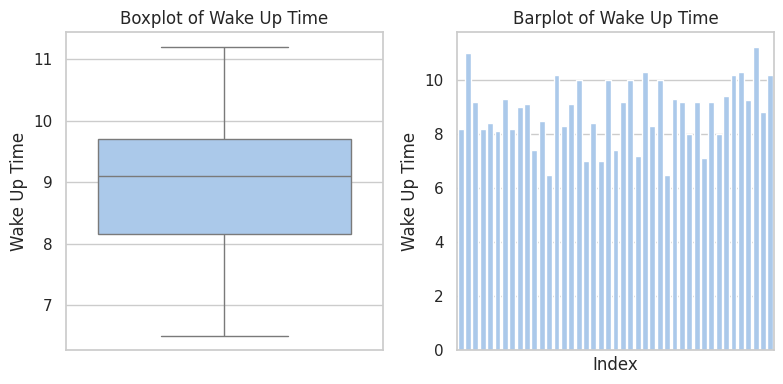

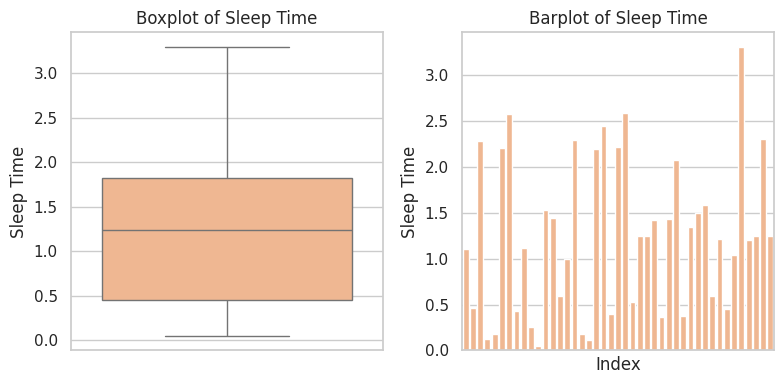

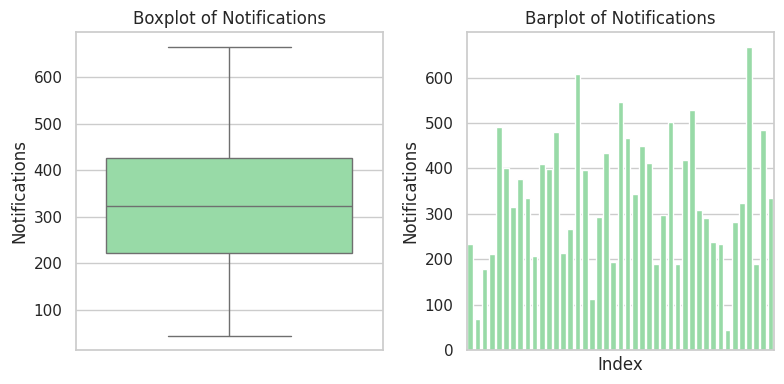

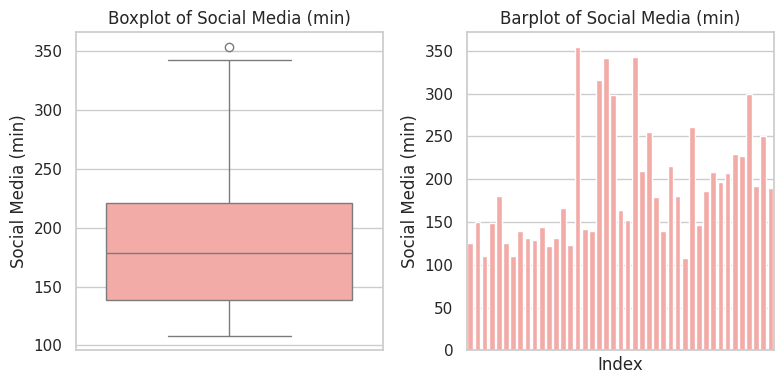

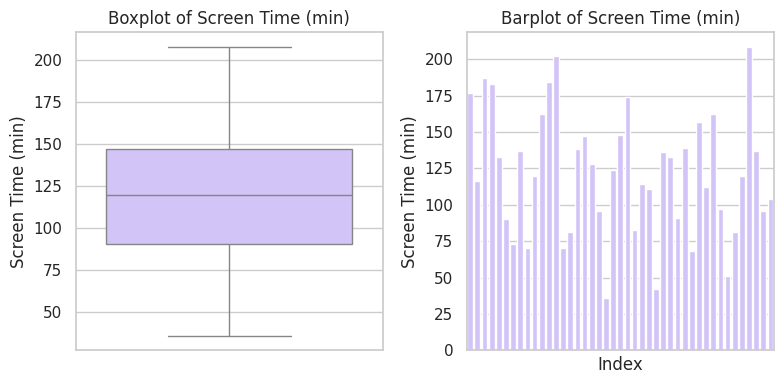

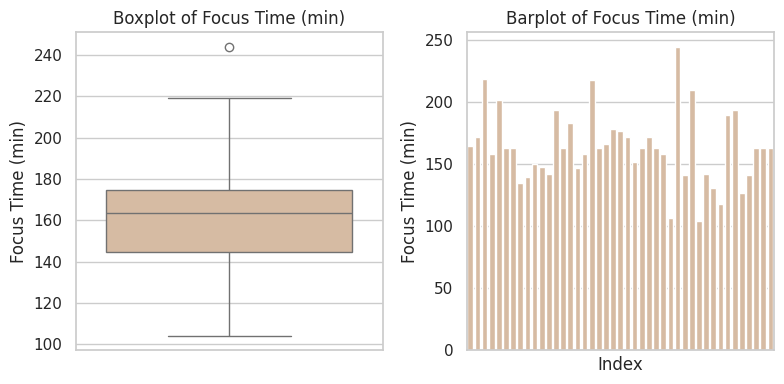

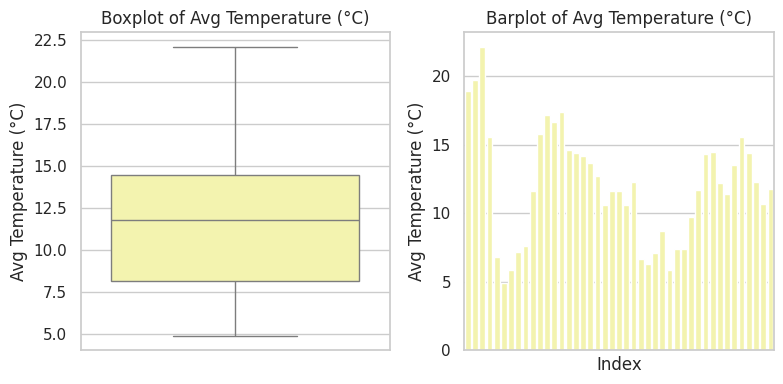

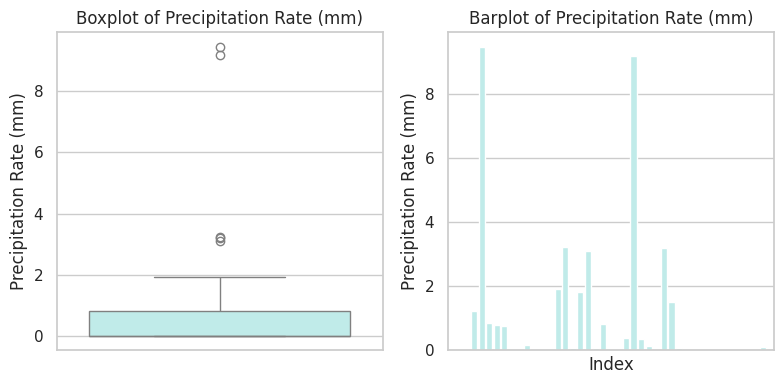

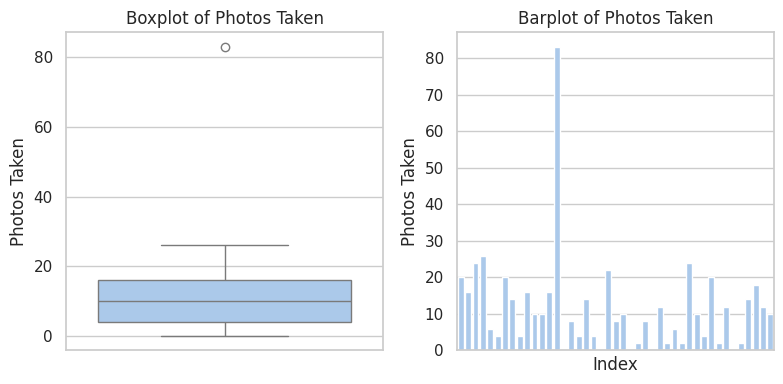

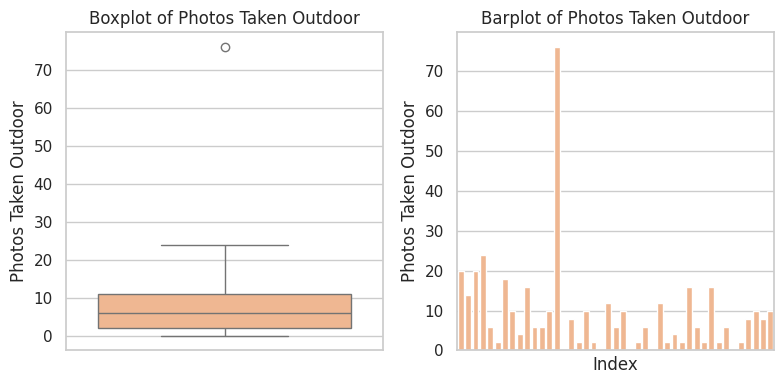

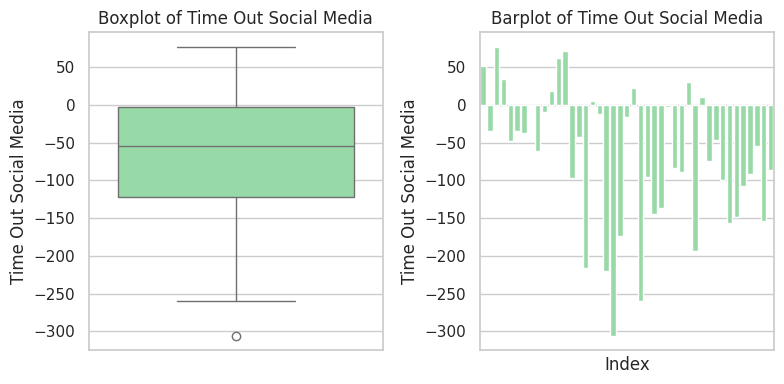

In [ ]:
# Visualization of Numeric Data with Enrichment
numeric_cols = df.select_dtypes(include='number').columns
colors = sns.color_palette("pastel", len(df.select_dtypes(include="number").columns))

for idx, col in enumerate(numeric_cols):
  if col!="Is_Weekend" and col !="Lecture Count":
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col], color=colors[idx])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)

    plt.subplot(1, 2, 2)
    sns.barplot(x=df.index, y=df[col], color=colors[idx])
    plt.title(f"Barplot of {col}")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.xticks([], [])

    plt.tight_layout()
    plt.show()

#### Visualization of categorical data

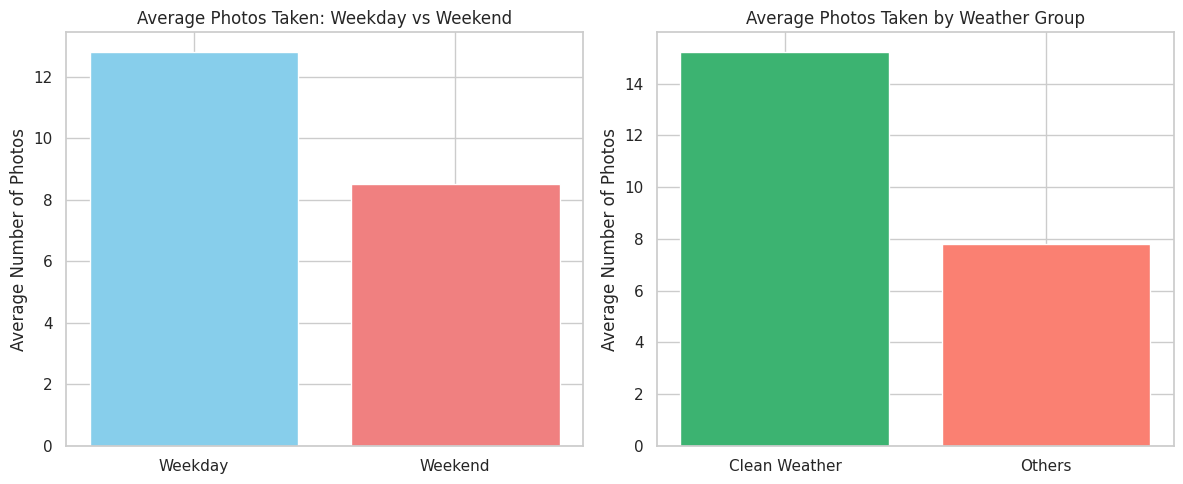

In [ ]:
photo_weekday_comparison = df.groupby("Is_Weekend")["Photos Taken"].mean()
labels_weekend = ['Weekday', 'Weekend']
values_weekend = photo_weekday_comparison.values

photo_weather_comparison = df.groupby("Weather Group")["Photos Taken"].mean()
labels_weather = photo_weather_comparison.index
values_weather = photo_weather_comparison.values

fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].bar(labels_weekend, values_weekend, color=["skyblue", "lightcoral"])
axes[0].set_title("Average Photos Taken: Weekday vs Weekend")
axes[0].set_ylabel("Average Number of Photos")

axes[1].bar(labels_weather, values_weather, color=["mediumseagreen", "salmon"])
axes[1].set_title("Average Photos Taken by Weather Group")
axes[1].set_ylabel("Average Number of Photos")

plt.tight_layout()
plt.show()

#### Relations among different datasets / columns

##### Correlation matrix betwee nall numeric variables

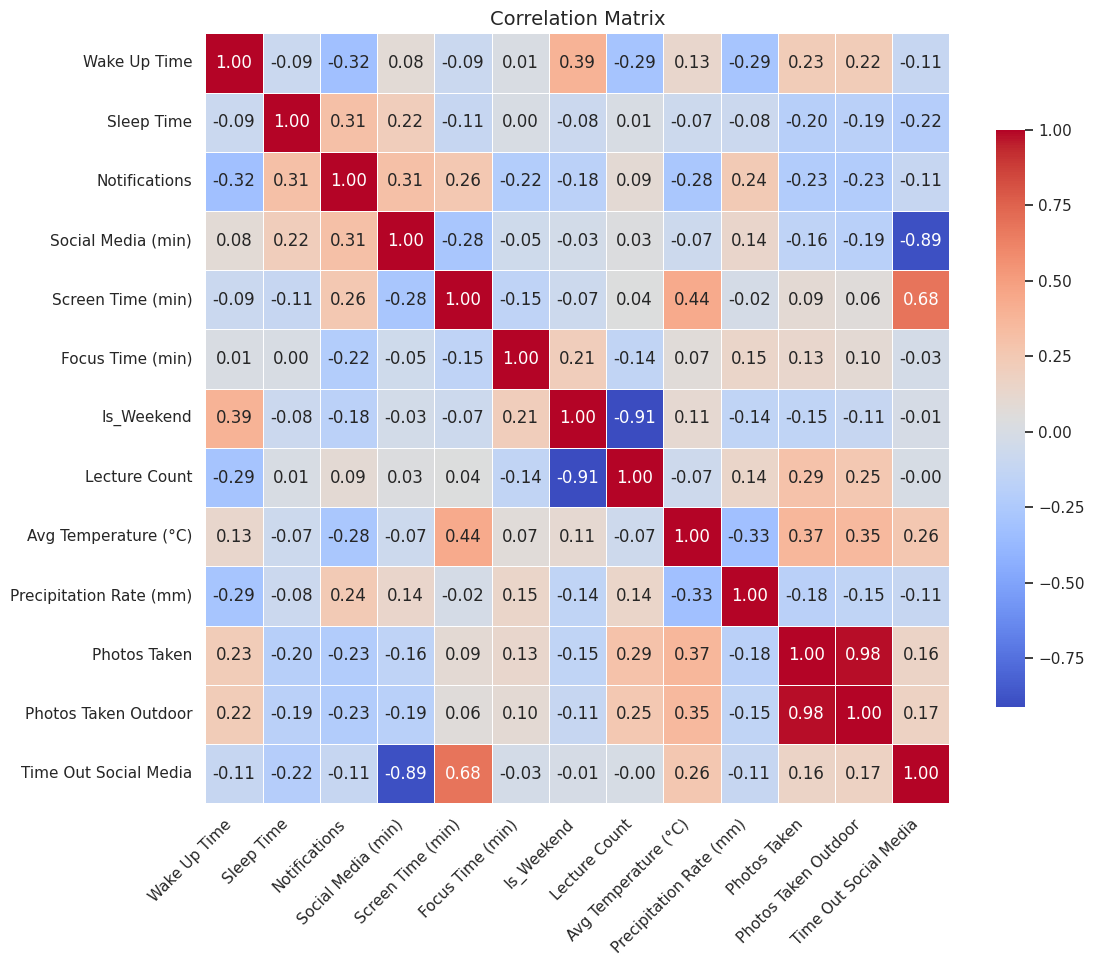

In [ ]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(12,10))

sns.heatmap(numeric_df.corr(),
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidths=0.5,
            cbar_kws={"shrink": .75})

plt.title("Correlation Matrix", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

##### Photos and temperature relation

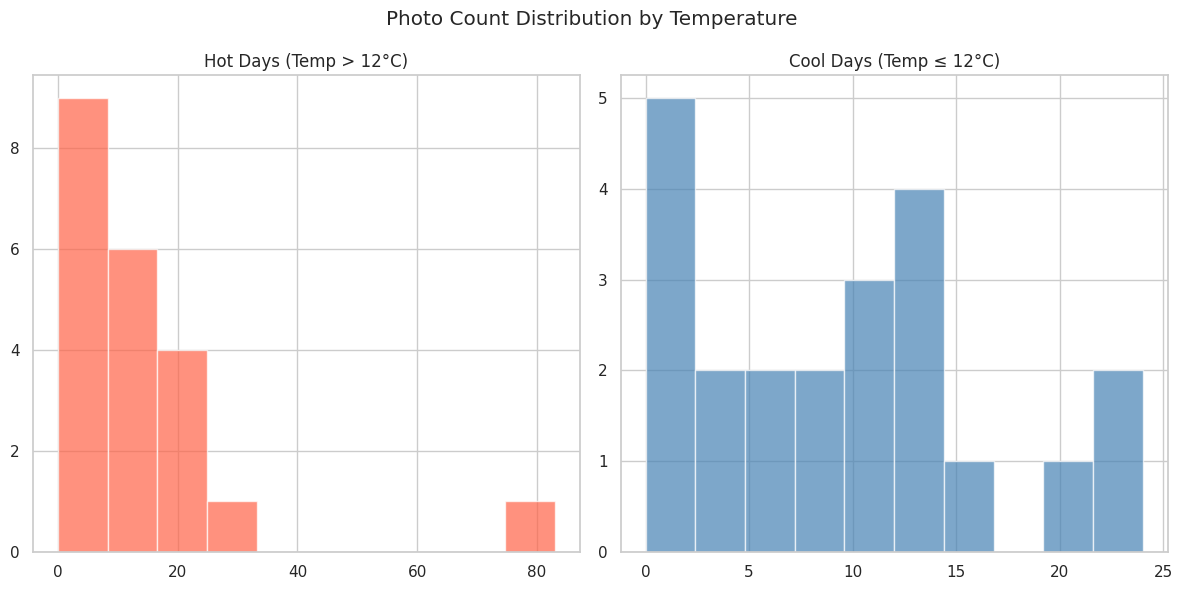

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

hot_days = df[df["Avg Temperature (°C)"] > 12]
cool_days = df[df["Avg Temperature (°C)"] <= 12]

axs[0].hist(hot_days["Photos Taken"], bins=10, color='tomato', alpha=0.7)
axs[0].set_title("Hot Days (Temp > 12°C)")

axs[1].hist(cool_days["Photos Taken"], bins=10, color='steelblue', alpha=0.7)
axs[1].set_title("Cool Days (Temp ≤ 12°C)")

fig.suptitle("Photo Count Distribution by Temperature")
plt.tight_layout()
plt.show()

##### Relation between Weather group and Photos taken outdoor

<ipython-input-156-652afa55a5ac>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Weather Group", y="Photos Taken Outdoor", data=df, palette="coolwarm")


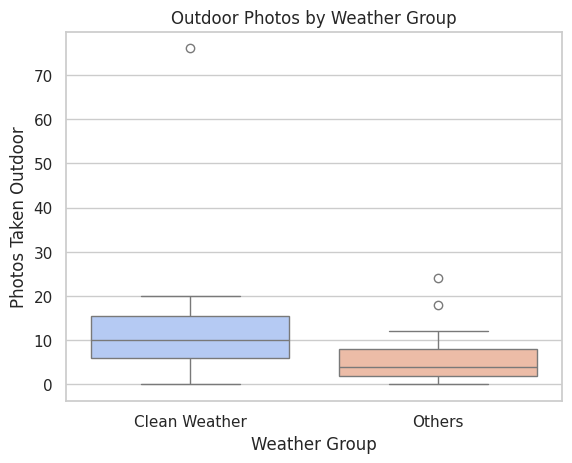

In [ ]:
sns.boxplot(x="Weather Group", y="Photos Taken Outdoor", data=df, palette="coolwarm")
plt.title("Outdoor Photos by Weather Group")
plt.show()

##### Relation among number of photos and rain information

<ipython-input-157-052a396619f9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Is_Rainy", y="Photos Taken", data=df, palette="coolwarm")


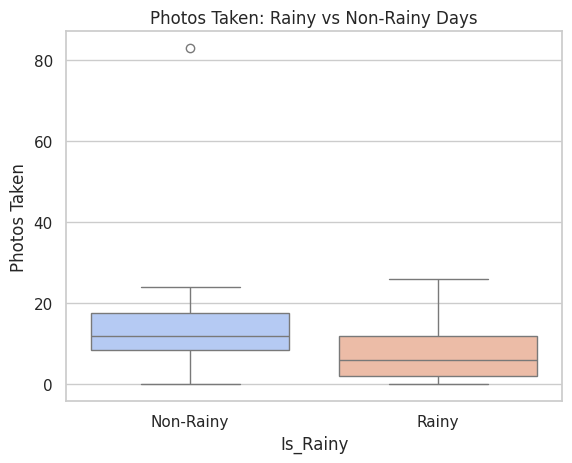

In [ ]:
sns.boxplot(x="Is_Rainy", y="Photos Taken", data=df, palette="coolwarm")
plt.xticks([0,1], ["Non-Rainy", "Rainy"])
plt.title("Photos Taken: Rainy vs Non-Rainy Days")
plt.show()

##### Pairplot consist of all possible scatterplots

Text(0.5, 1.02, 'Sayısal Değişkenler Arası Dağılımlar')

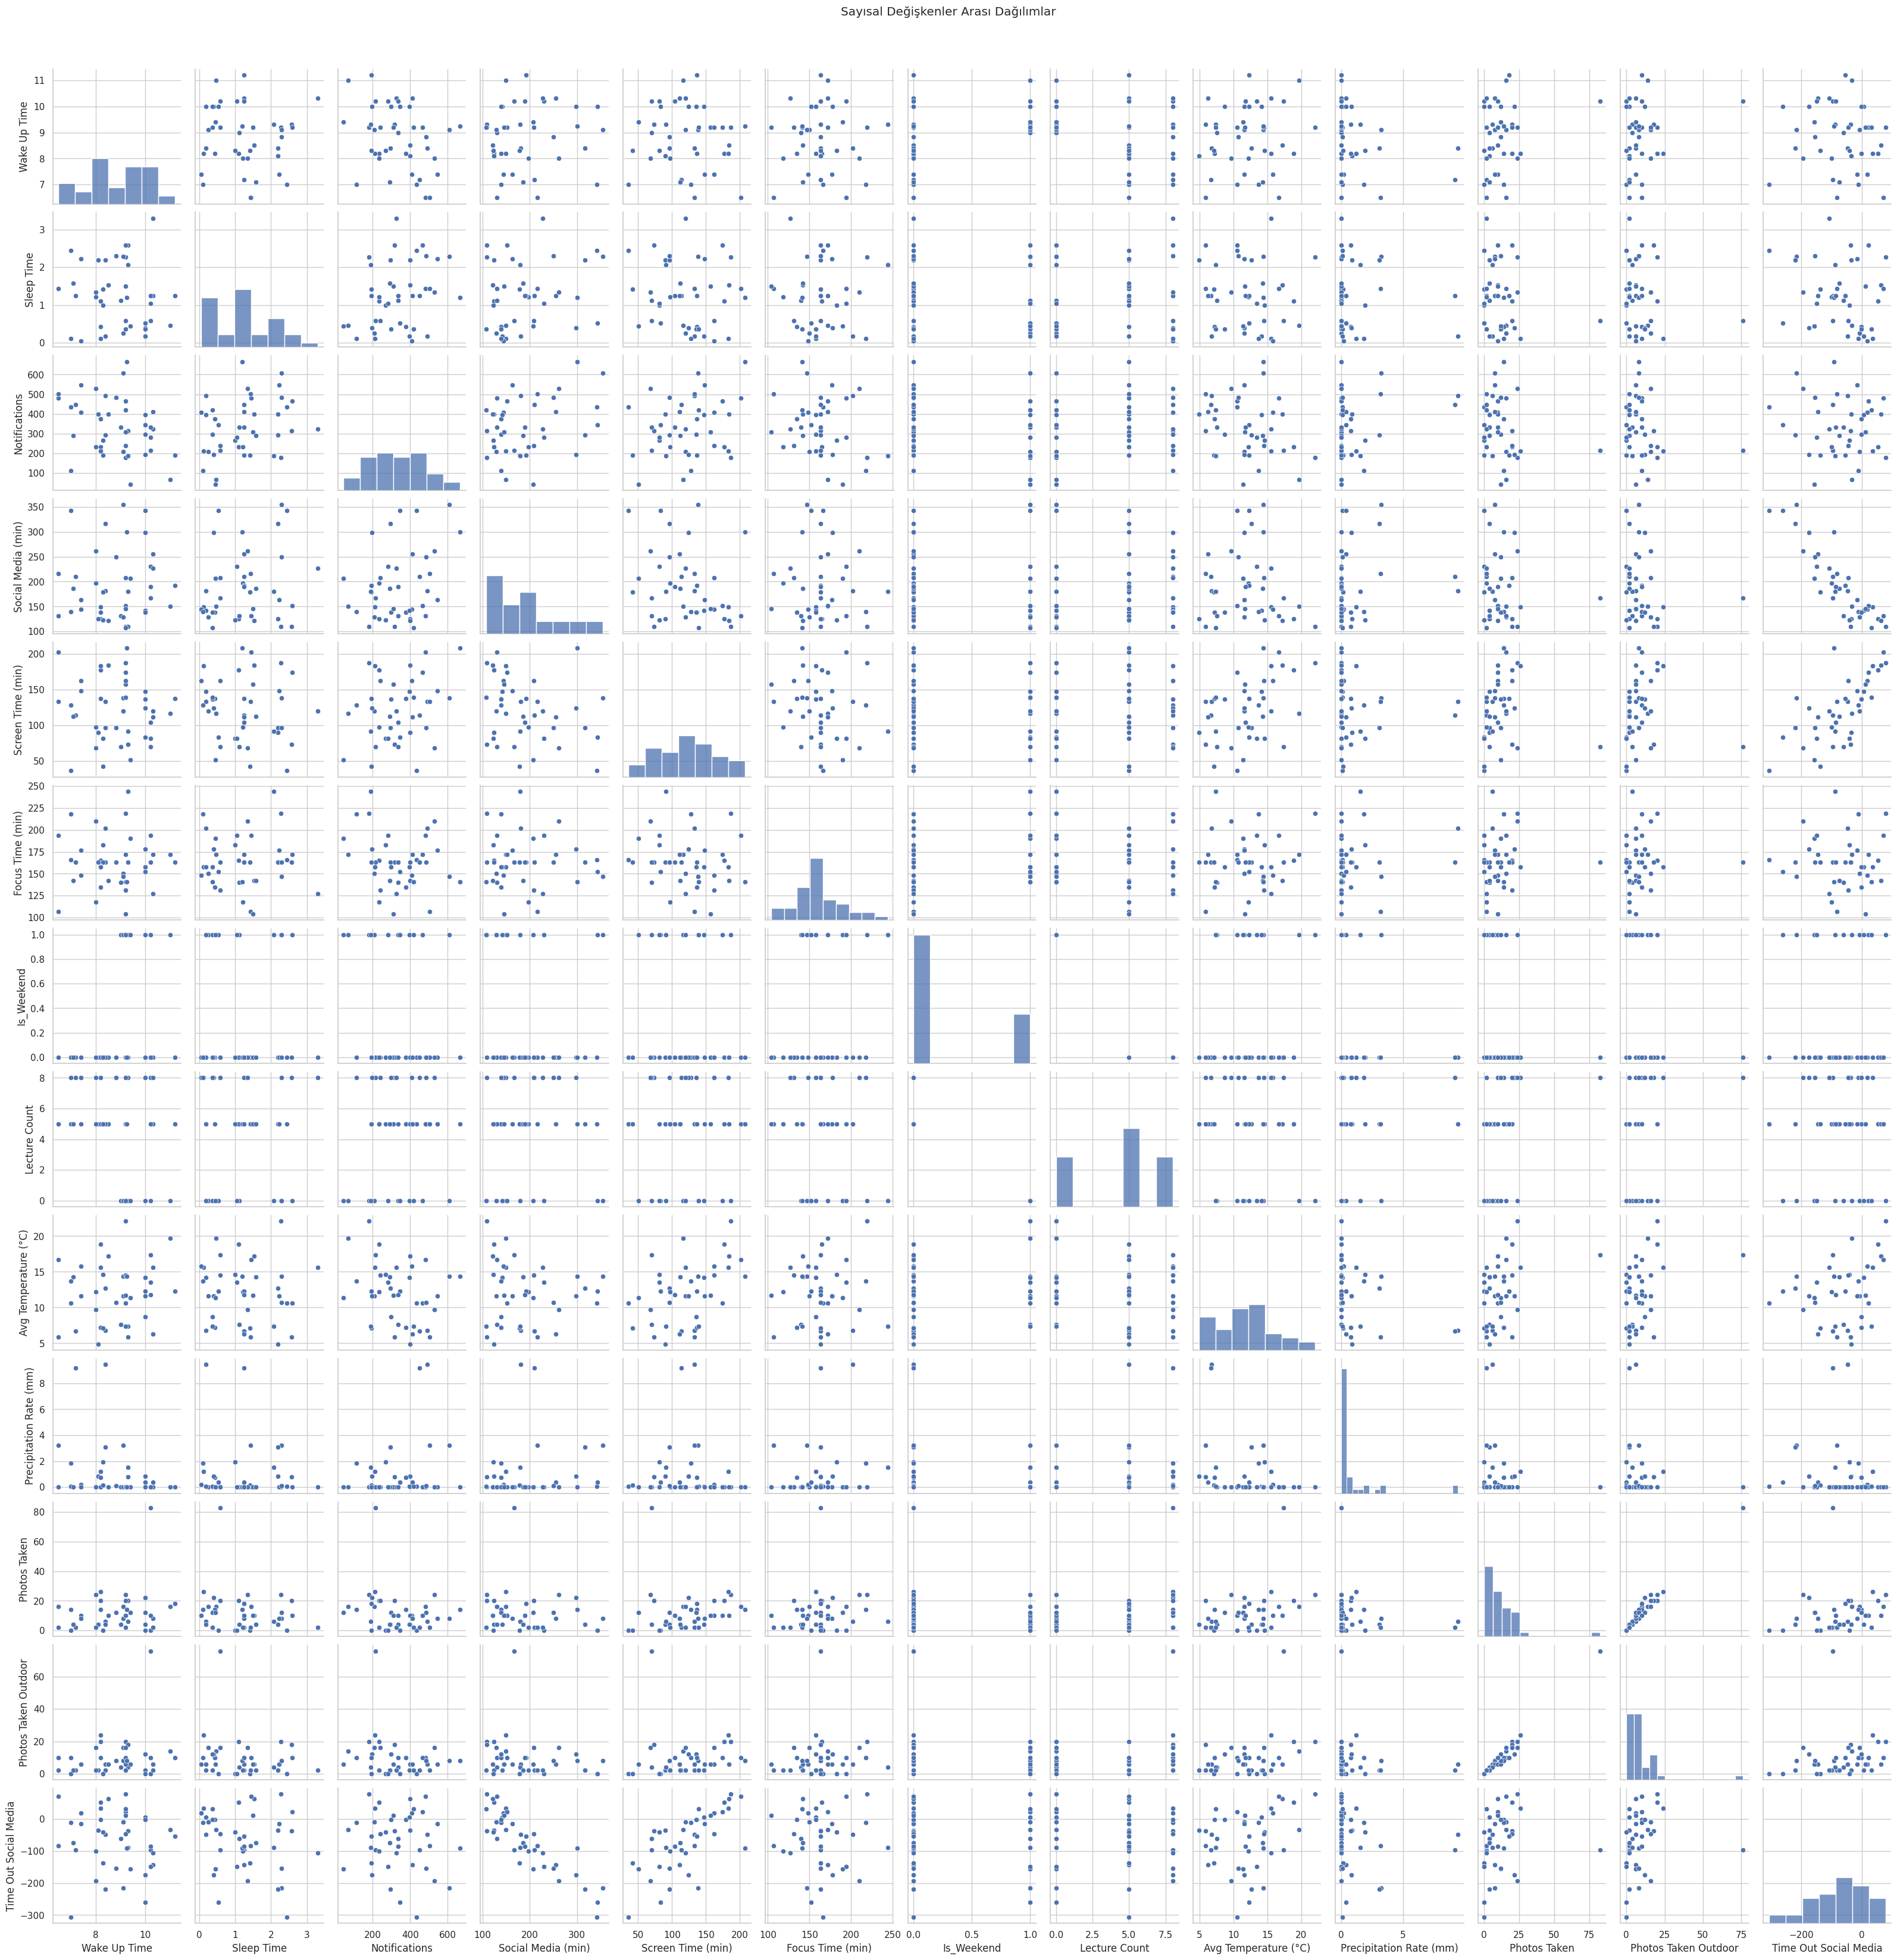

In [ ]:
sns.pairplot(df.select_dtypes(include='number'))
plt.suptitle("Sayısal Değişkenler Arası Dağılımlar", y=1.02)

# Hypothesis Testes
🧪 Hypothesis 1:
Weather condition affects the number of outdoor photos taken.

🧪 Hypothesis 2:
Weekend status affects screen time.

🧪 Hypothesis 3:
Temperature is correlated with the number of photos taken.

## Hypothesis 1: Weather condition affects the number of outdoor photos taken.

- **H₀ (Null Hypothesis):**  
  The average number of outdoor photos taken is the same on good weather days ("Clean + Sunny + Cloudy") and other days ("Others").  
  (No significant difference.)

- **H₁ (Alternative Hypothesis):**  
  The average number of outdoor photos taken is different between good weather days and other days.  
  (Significant difference exists.)

In [ ]:
group_good = df[df["Weather Group"] == "Clean Weather"]["Photos Taken Outdoor"].dropna()
group_bad = df[df["Weather Group"] == "Others"]["Photos Taken Outdoor"].dropna()

t_stat, p_val = ttest_ind(group_good, group_bad, equal_var=False)
print(f"t-statistic: {t_stat:.4f} | p-value: {p_val:.4f}")

t-statistic: 1.8192 | p-value: 0.0796


## Hypothesis 2: Weekend status affects screen time.

- **H₀ (Null Hypothesis):**  
  The average screen time is the same on weekdays and weekends.  
  (No significant difference.)

- **H₁ (Alternative Hypothesis):**  
  The average screen time differs between weekdays and weekends.  
  (Significant difference exists.)


In [ ]:
group_weekday = df[df["Is_Weekend"] == False]["Screen Time (min)"]
group_weekend = df[df["Is_Weekend"] == True]["Screen Time (min)"]

t_stat, p_val = ttest_ind(group_weekend, group_weekday)
print(f"t-statistic: {t_stat:.4f} | p-value: {p_val:.4f}")

t-statistic: -0.4639 | p-value: 0.6452


## Hypothesis 3: Temperature is correlated with the number of photos taken.

- **H₀ (Null Hypothesis):**  
  There is no correlation between the average temperature and the number of photos taken.  
  (Correlation coefficient = 0)

- **H₁ (Alternative Hypothesis):**  
  There is a correlation between the average temperature and the number of photos taken.  
  (Correlation coefficient ≠ 0)

In [ ]:
r, p = pearsonr(df["Avg Temperature (°C)"], df["Photos Taken"])
print(f"Correlation coefficient:{r:.4f} | p-value: {p:.4f}")

Correlation coefficient:0.3668 | p-value: 0.0155


# Part 2: Machine Learning

In this section, we apply basic machine learning (ML) models using the dataset we have collected.

### 🎯 Goals:
- To **predict the number of photos taken** using weather and phone usage data (regression)
- To **classify days with high photo activity** based on certain conditions (classification)

### 🛠️ Models We Will Use:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- K-Nearest Neighbors (KNN)
- Logistic Regression (for classification)

For each model, we will evaluate performance using visualizations and metrics such as:
- MAE, MSE, R² (for regression)
- Accuracy, Precision, Recall, F1-Score (for classification)

The goal is to see whether digital behavior can be predicted from environmental and usage patterns.

## 📦 Data Preparation

Before training any machine learning models, we first need to prepare the dataset.

This includes:
- Renaming and cleaning columns
- Handling missing values
- Encoding categorical features (like weather type)
- Selecting relevant features for modeling
- Splitting the data into training and testing sets

Proper data preparation is essential for getting reliable and interpretable results from machine learning models.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_excel("dsa_weather_merged_data.xlsx")

df = df.rename(columns={"Number of Photots taken": "Photos_Taken"})

df = pd.get_dummies(df, columns=["Weather Type"], drop_first=True)

features = [
    'Avg Temperature (°C)', 'Precipitation Rate (mm)', 'Is_Weekend',
    'Lecture Count', 'Screen Time (min)', 'Social Media (min)', 'Focus Time (min)'
] + [col for col in df.columns if "Weather Type_" in col]

X = df[features].fillna(0)
y = df["Photos_Taken"].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42
)

## 📈 Model 1: Linear Regression

Linear Regression is a fundamental predictive model that attempts to draw a straight line through data points to model their relationship.

In this case, we use it to predict the **number of photos taken** using features like weather conditions and screen usage.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_pred = lin_model.predict(X_test)

lin_mae = mean_absolute_error(y_test, lin_pred)
lin_mse = mean_squared_error(y_test, lin_pred)
lin_r2 = r2_score(y_test, lin_pred)

print(f"MAE: {lin_mae:.2f}")
print(f"MSE: {lin_mse:.2f}")
print(f"R² Score: {lin_r2:.2f}")

MAE: 14.16
MSE: 479.31
R² Score: -1.37


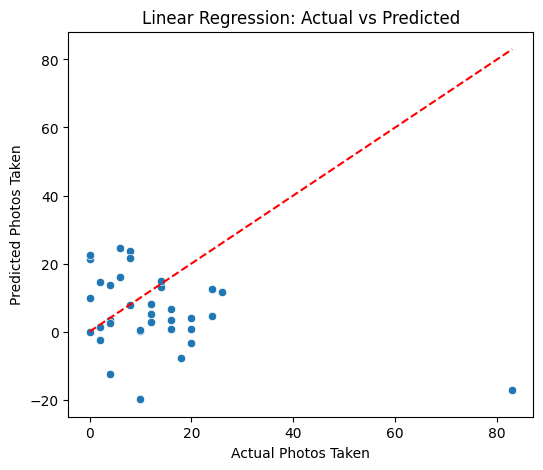

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=lin_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Photos Taken")
plt.ylabel("Predicted Photos Taken")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

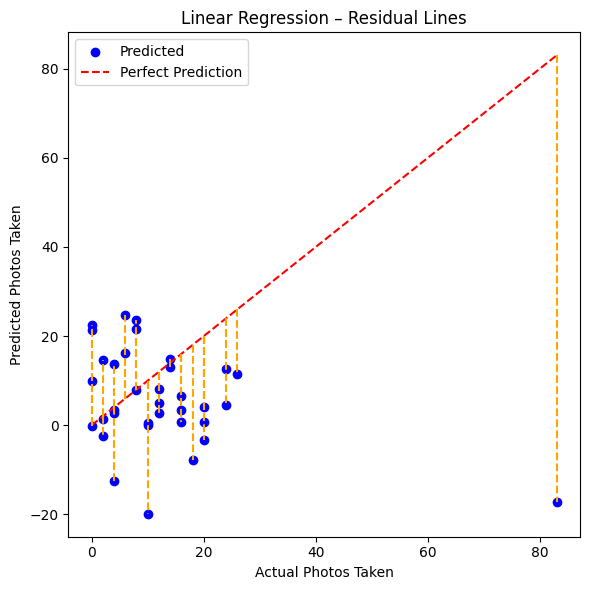

In [21]:
plt.figure(figsize=(6, 6))

plt.scatter(y_test, lin_pred, label="Predicted", color="blue")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")

for actual, predicted in zip(y_test, lin_pred):
    plt.plot([actual, actual], [actual, predicted], 'orange', linestyle='--')

plt.xlabel("Actual Photos Taken")
plt.ylabel("Predicted Photos Taken")
plt.title("Linear Regression – Residual Lines")
plt.legend()
plt.tight_layout()
plt.show()

- Linear Regression struggled to capture the pattern in the data.
- The R² score is negative, meaning it performs worse than a simple mean-based prediction - that is poor 🥲.
- This suggests a weak or non-linear relationship between weather conditions and the number of photos taken.

## 🌳 Model 2: Decision Tree Regressor

Decision Tree Regressor splits the data into regions using decision rules.  
It can model non-linear relationships effectively, though it may overfit on small datasets.


In [19]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
tree_pred = tree_reg.predict(X_test)

tree_mae = mean_absolute_error(y_test, tree_pred)
tree_mse = mean_squared_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)

print(f"MAE: {tree_mae:.2f}")
print(f"MSE: {tree_mse:.2f}")
print(f"R² Score: {tree_r2:.2f}")

MAE: 8.54
MSE: 255.69
R² Score: -0.27


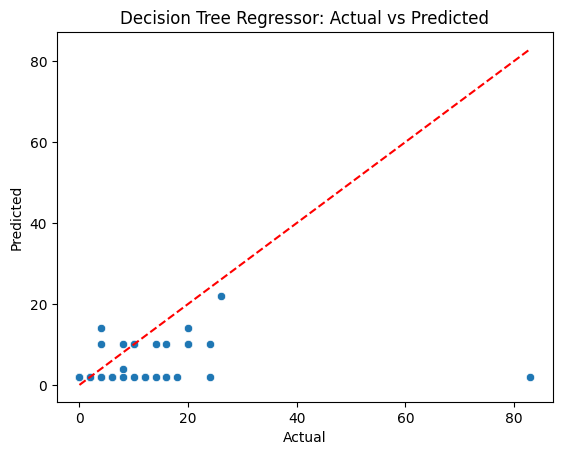

In [20]:
sns.scatterplot(x=y_test, y=tree_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Decision Tree Regressor: Actual vs Predicted")
plt.show()

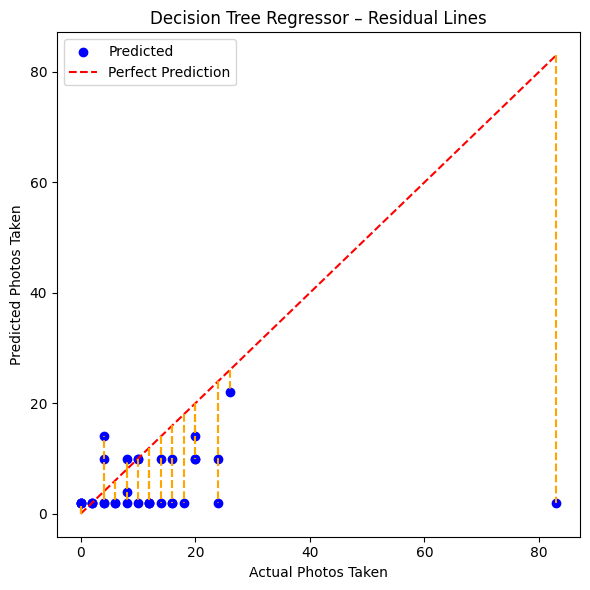

In [23]:
plt.figure(figsize=(6, 6))

plt.scatter(y_test, tree_pred, label="Predicted", color="blue")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")

for actual, predicted in zip(y_test, tree_pred):
    plt.plot([actual, actual], [actual, predicted], 'orange', linestyle='--')

plt.xlabel("Actual Photos Taken")
plt.ylabel("Predicted Photos Taken")
plt.title("Decision Tree Regressor – Residual Lines")
plt.legend()
plt.tight_layout()
plt.show()

- Decision Tree captures non-linear patterns better than linear models.
- However, the variance may be high, and R² score may still be low due to limited data.

## 🌲 Model 3: Random Forest Regressor

Random Forest builds multiple decision trees and averages their predictions.  
This helps reduce overfitting and improves prediction stability.

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"MAE: {rf_mae:.2f}")
print(f"MSE: {rf_mse:.2f}")
print(f"R² Score: {rf_r2:.2f}")

MAE: 8.35
MSE: 235.50
R² Score: -0.17


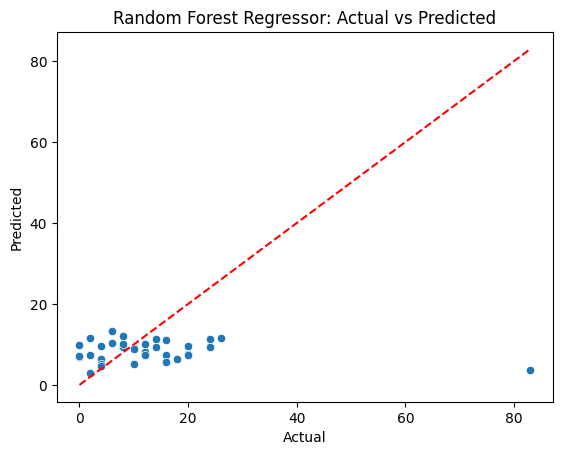

In [25]:
sns.scatterplot(x=y_test, y=rf_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest Regressor: Actual vs Predicted")
plt.show()

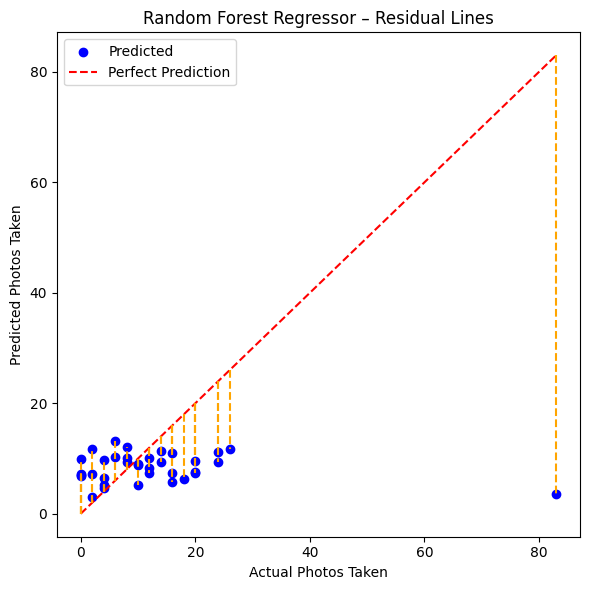

In [27]:
plt.figure(figsize=(6, 6))

plt.scatter(y_test, rf_pred, label="Predicted", color="blue")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")

for actual, predicted in zip(y_test, rf_pred):
    plt.plot([actual, actual], [actual, predicted], 'orange', linestyle='--')

plt.xlabel("Actual Photos Taken")
plt.ylabel("Predicted Photos Taken")
plt.title("Random Forest Regressor – Residual Lines")
plt.legend()
plt.tight_layout()
plt.show()

- Random Forest produced more stable and accurate results.
- Compared to a single tree, it is more robust to overfitting.
- Typically shows the best generalization on medium datasets.

## 👥 Model 4: K-Nearest Neighbors Regressor

KNN predicts based on the average of the nearest data points.  
It's non-parametric and highly dependent on data distribution and distance metric.

In [28]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
knn_pred = knn_reg.predict(X_test)

knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

print(f"MAE: {knn_mae:.2f}")
print(f"MSE: {knn_mse:.2f}")
print(f"R² Score: {knn_r2:.2f}")

MAE: 8.49
MSE: 232.11
R² Score: -0.15


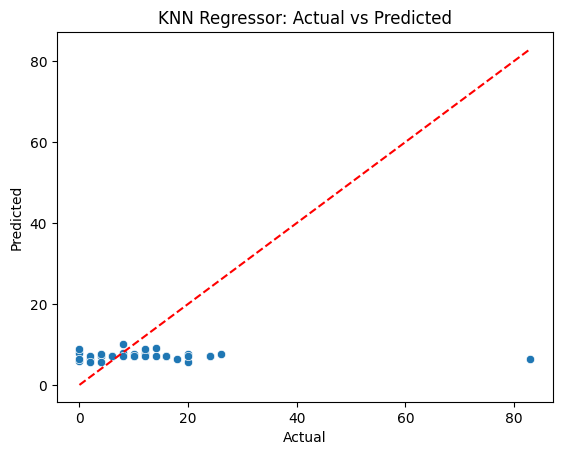

In [29]:
sns.scatterplot(x=y_test, y=knn_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("KNN Regressor: Actual vs Predicted")
plt.show()

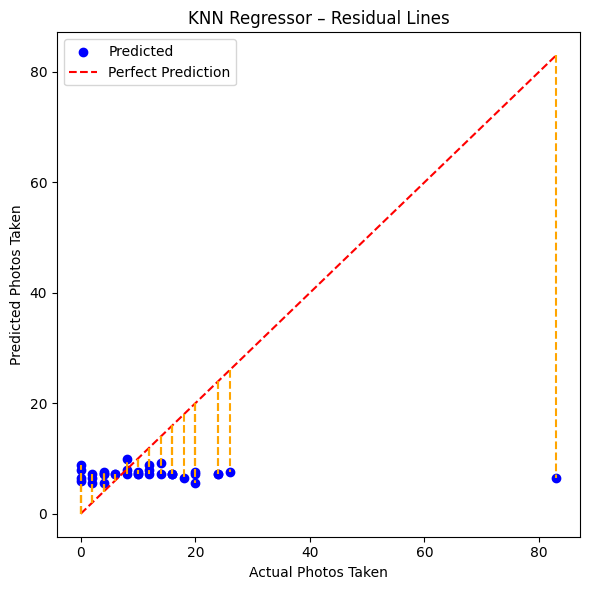

In [33]:
plt.figure(figsize=(6, 6))

plt.scatter(y_test, knn_pred, label="Predicted", color="blue")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")

for actual, predicted in zip(y_test, knn_pred):
    plt.plot([actual, actual], [actual, predicted], 'orange', linestyle='--')

plt.xlabel("Actual Photos Taken")
plt.ylabel("Predicted Photos Taken")
plt.title("KNN Regressor – Residual Lines")
plt.legend()
plt.tight_layout()
plt.show()

- KNN performed moderately and may be sensitive to feature scaling.
- It benefits from more data and careful distance metric selection.

## 📊 Regression Model Comparison

We summarize and compare the performance of all four regression models using three key metrics:
- **MAE (Mean Absolute Error)** — lower is better
- **MSE (Mean Squared Error)** — lower is better
- **R² Score** — higher is better

This comparison helps identify which model fits the data best.

In [31]:
regression_results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "KNN"],
    "MAE": [lin_mae, tree_mae, rf_mae, knn_mae],
    "MSE": [lin_mse, tree_mse, rf_mse, knn_mse],
    "R²": [lin_r2, tree_r2, rf_r2, knn_r2]
})

regression_results.sort_values("MAE", inplace=True)
display(regression_results)

,Model,MAE,MSE,R²
2,Random Forest,8.353714,235.495531,-0.166385
3,KNN,8.485714,232.106286,-0.149599
1,Decision Tree,8.542857,255.685714,-0.266385
0,Linear Regression,14.164699,479.308954,-1.373968


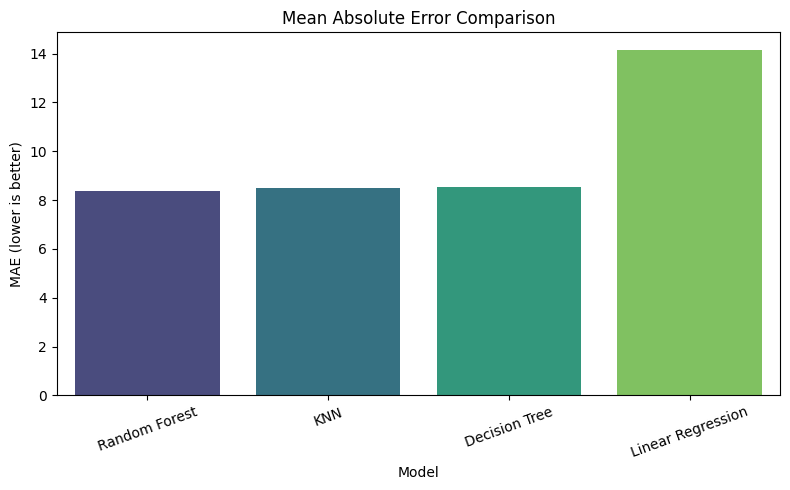

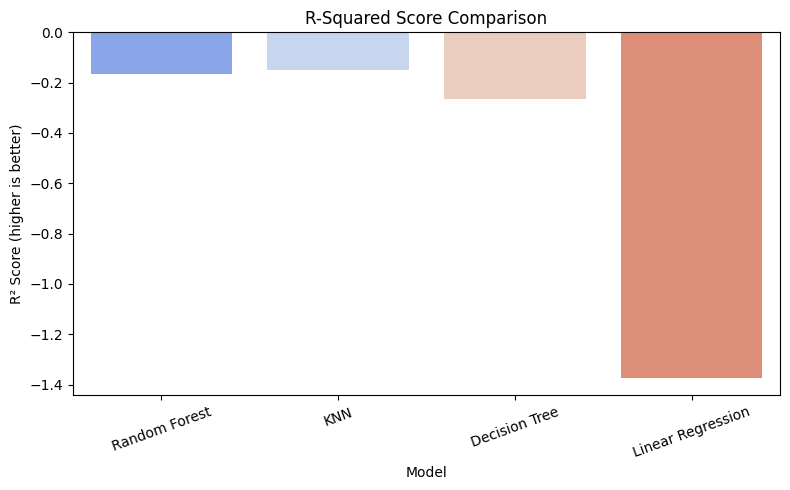

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(data=regression_results, x="Model", y="MAE", hue="Model", dodge=False, palette=sns.color_palette("viridis", n_colors=4))
plt.title("Mean Absolute Error Comparison")
plt.ylabel("MAE (lower is better)")
plt.xlabel("Model")
plt.xticks(rotation=20)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=regression_results, x="Model", y="R²", hue="Model", dodge=False, palette=sns.color_palette("coolwarm", n_colors=4))
plt.title("R-Squared Score Comparison")
plt.ylabel("R² Score (higher is better)")
plt.xlabel("Model")
plt.xticks(rotation=20)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

## 🧭 Why Try Classification?

Although we applied several regression models to predict the number of photos taken per day, the results were not as strong as expected.

- R² scores were mostly low or even negative, indicating poor model fit.
- This might be due to limited data, high variability, or missing influential factors.

For this reason, we now take a different approach.

📌 Instead of predicting the exact number of photos, we will **classify days into two categories**:
- Days with high photo activity (more than 10 photos)
- Days with low or no photo activity

This classification task may be more suitable for our dataset, and could produce more reliable results.

## 🔍 Classification Models

In this section, we use classification algorithms to predict whether a day is a **high-photo activity day** or not.

We define:
- 1 → Day with more than 10 photos taken
- 0 → Day with 10 or fewer photos taken

We will train and evaluate the following models:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- K-Nearest Neighbors (KNN)

Each model's performance will be evaluated using metrics like:
- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix

In [39]:
from sklearn.model_selection import train_test_split

df["High_Photo"] = (df["Photos_Taken"] > 10).astype(int)

features = [
    'Avg Temperature (°C)', 'Precipitation Rate (mm)', 'Is_Weekend',
    'Lecture Count', 'Screen Time (min)', 'Social Media (min)', 'Focus Time (min)'
] + [col for col in df.columns if "Weather Type_" in col]

X_cls = df[features].fillna(0)
y_cls = df["High_Photo"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls, y_cls, test_size=0.8, random_state=42)

### ⚙️ Model 1: Logistic Regression

This model estimates the probability of a high-photo day based on weather and phone usage data.
It is simple and interpretable, useful as a baseline for comparison.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

log_model = LogisticRegression(max_iter=1000)
log_model.fit(Xc_train, yc_train)
log_pred = log_model.predict(Xc_test)

log_acc = accuracy_score(yc_test, log_pred)
log_prec = precision_score(yc_test, log_pred)
log_rec = recall_score(yc_test, log_pred)
log_f1 = f1_score(yc_test, log_pred)

print(f"Accuracy:  {log_acc:.2f}")
print(f"Precision: {log_prec:.2f}")
print(f"Recall:    {log_rec:.2f}")
print(f"F1 Score:  {log_f1:.2f}")

Accuracy:  0.49
Precision: 0.38
Recall:    0.19
F1 Score:  0.25


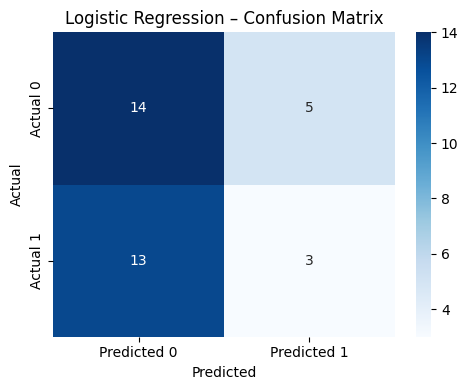

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

log_cm = confusion_matrix(yc_test, log_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Logistic Regression – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [45]:
cm = confusion_matrix(yc_test, log_pred)
tn, fp, fn, tp = cm.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")

Accuracy : 0.49
Precision: 0.38
Recall   : 0.19
F1 Score : 0.25


## 📊 Classification Metrics (Logistic Regression)

| **Metric**   | **Value** | **Formula**                            | **Explanation**                         |
|--------------|-----------|----------------------------------------|------------------------------------------|
| Accuracy     | 0.49      | (TP + TN) / Total = (3 + 14) / 35      | Overall prediction correctness           |
| Precision    | 0.38      | TP / (TP + FP) = 3 / (3 + 5)           | Correctness of "high photo" predictions |
| Recall       | 0.19      | TP / (TP + FN) = 3 / (3 + 13)          | How many actual high-photo days caught  |
| F1 Score     | 0.25      | Harmonic mean of precision & recall    | Balanced metric                          |



---

### 🧠 Interpretation

- The model performs **better on predicting non-photo days** (class 0).
- It misses most actual high-photo days → low **recall**.
- Precision is decent: when it says “high-photo day”, it’s often right.
- These results suggest class imbalance or weak correlation in the features used.

## 🔁 Cross-Validation Results (All Models)

To evaluate model stability and generalization performance, we applied 5-fold cross-validation to all models.

Below are the average scores across folds for each model.

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
cv_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring=mae_scorer)

print("Cross-validated MAE scores:", -cv_scores)
print("Average MAE:", -cv_scores.mean())

Cross-validated MAE scores: [10.14531018 13.82559135 10.01123485  6.43921154 11.95284207]
Average MAE: 10.474837997122647


Cross-validation gives a more reliable average MAE across 5 splits, reducing the risk of overfitting to one train/test split.


In [47]:
cv_scores = cross_val_score(DecisionTreeRegressor(), X, y, cv=5, scoring=mae_scorer)

print("Cross-validated MAE scores:", -cv_scores)
print("Average MAE:", -cv_scores.mean())

Cross-validated MAE scores: [25.44444444 12.55555556  7.77777778  7.          8.        ]
Average MAE: 12.155555555555555


Decision Tree's average error is evaluated across multiple folds to test its generalization ability.

In [48]:
cv_scores = cross_val_score(RandomForestRegressor(), X, y, cv=5, scoring=mae_scorer)

print("Cross-validated MAE scores:", -cv_scores)
print("Average MAE:", -cv_scores.mean())

Cross-validated MAE scores: [15.95888889 13.43777778  8.40111111  5.8775      5.9325    ]
Average MAE: 9.921555555555553


Random Forest is cross-validated to assess if its predictions remain stable across different subsets of data.

In [49]:
cv_scores = cross_val_score(KNeighborsRegressor(), X, y, cv=5, scoring=mae_scorer)

print("Cross-validated MAE scores:", -cv_scores)
print("Average MAE:", -cv_scores.mean())

Cross-validated MAE scores: [ 9.06666667 12.86666667 12.42222222  6.35        6.675     ]
Average MAE: 9.476111111111113


We use 5-fold CV to evaluate KNN's average error and avoid depending on a single test set.

In [50]:
cv_scores = cross_val_score(LogisticRegression(max_iter=1000), X_cls, y_cls, cv=5, scoring='accuracy')

print("Cross-validated accuracy scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())

Cross-validated accuracy scores: [0.55555556 0.55555556 0.66666667 0.625      0.125     ]
Average accuracy: 0.5055555555555555


Logistic Regression is evaluated using cross-validation to better estimate its overall accuracy on unseen data.

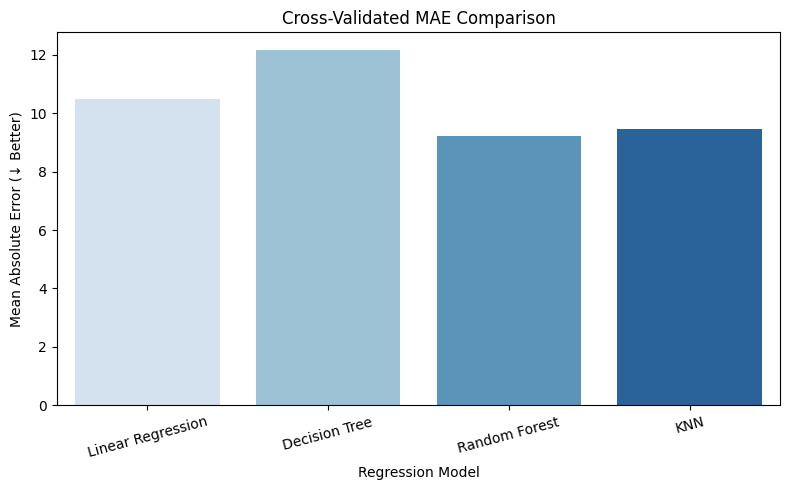

In [54]:
plt.figure(figsize=(8, 5))
sns.barplot(data=mae_df, x="Model", y="MAE", hue="Model", palette=colors, dodge=False)
plt.title("Cross-Validated MAE Comparison")
plt.ylabel("Mean Absolute Error (↓ Better)")
plt.xlabel("Regression Model")
plt.xticks(rotation=15)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()